<a href="https://colab.research.google.com/github/wbandabarragan/EPIC_3/blob/main/EPIC_Junior/evento-septiembre-2023/3_Computaci%C3%B3n_Cu%C3%A1ntica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computacion Cuantica in a Nutshell
La computación cuántica es un campo de la informática que utiliza principios de la mecánica cuántica(Fisica) para realizar cálculos y resolver problemas de manera potencialmente mucho más rápida que las computadoras clásicas.
La computación cuántica es una revolucionaria forma de procesamiento de información que aprovecha las propiedades únicas de la mecánica cuántica para resolver problemas complejos de manera más rápida y eficiente que las computadoras tradicionales en ciertas aplicaciones específicas.

## Como funciona?
Para entender como funciona vamos a introducir cuatro conceptos claves:

- **[Qubit]**
- **[Superposicion]**
- **[Entrelazamiento]**
- **[Medida]**


### Qubit?

![archivos](archivos.jpg)
![qubit](qubit-1.jpg)
![transmon-energy-levels.png](transmon-energy-levels.png)
![spin](spin.jpg)

A diferencia de los bits clásicos, que son 0 o 1, los qubits pueden representar 0, 1 o una superposición de ambos estados al mismo tiempo debido a los principios de la mecánica cuántica. Un qubit matematicamente se expresa mediante la siguiente expresion: $$ 2^{N}$$. Donde N representa el numero de qubits.

In [ ]:
def qubit(estado):
    """ Esta es una funcion que grafica los posibles estados que se pueden
    representar en una esfera de Bloch-qubit
    Args:
    estado: Un vector que contiene las conrdenadas x,y,z [x,y,z]
    Returns:
    """
    # Importamos la libreria para realizar el grafico
    from qiskit.visualization import plot_bloch_vector
    bloch = plot_bloch_vector(estado, title='Esfera de Bloch')
    return bloch

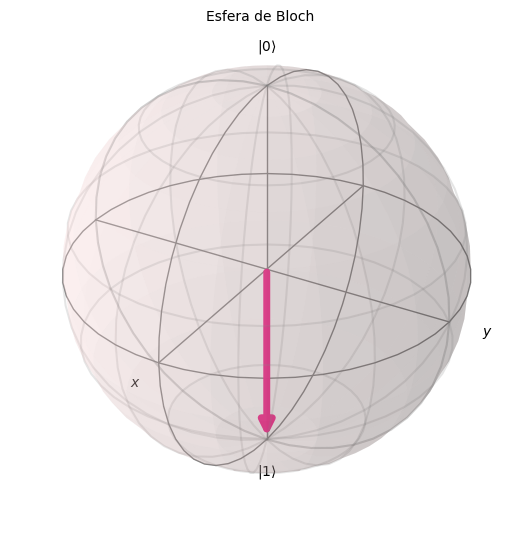

In [ ]:
qubit([0,0,-1])

### Superposicion

![gato](gato.jpeg)
![atomos](atomos.png)
La superposición cuántica permite que una computadora cuántica explore múltiples soluciones simultáneamente, lo que puede acelerar significativamente la resolución de ciertos problemas complejos.

In [ ]:
def superposicion(n_qubits):
    """Esta es una funcion que grafica los posibles estados de superposicion
    que un qubit puede tener
     Args:
      n_qubits : Numero de qubits
      Returns: grafico con los posibles estados de superposicion"""
    from qiskit.visualization import plot_state_qsphere
    from qiskit import QuantumCircuit
    qc = QuantumCircuit(n_qubits)
    for i in range(n_qubits):
        qc.h(i)
    bloch = display(plot_state_qsphere(qc))
    #circuito = display(qc.draw('mpl'))
    return bloch #circuito

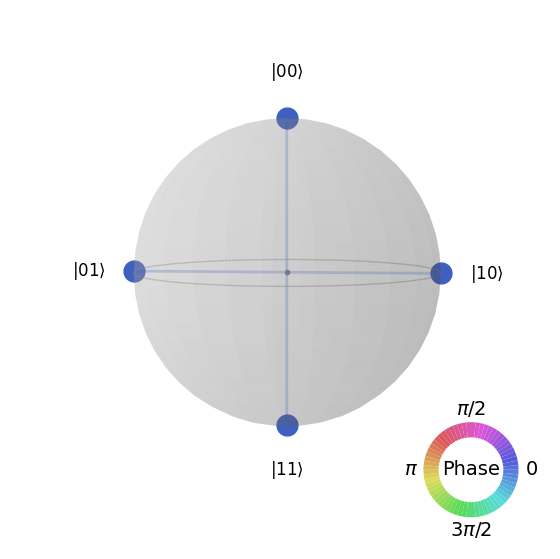

In [ ]:
superposicion(2)

### Entrelazamiento
![entrelazamiento](entrelazamiento.jpeg)

Los qubits pueden estar entrelazados, lo que significa que el estado de uno está relacionado con el estado del otro, incluso si están separados por largas distancias. Esto permite realizar cálculos paralelos eficientes.

In [ ]:
def entrelazamiento(n_qubits):
    from qiskit import QuantumCircuit
    from qiskit.visualization import plot_state_qsphere
    qc = QuantumCircuit(n_qubits)
    qc.x(0)
    for i in range(n_qubits):
        qc.h(i)
    for i in range(n_qubits):
        qc.cx(i, (i+1) % n_qubits)
    circuit = display(qc.draw('mpl'))
    bloch = display(plot_state_qsphere(qc))
    return circuit, bloch


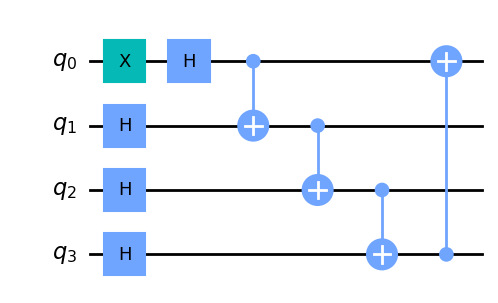

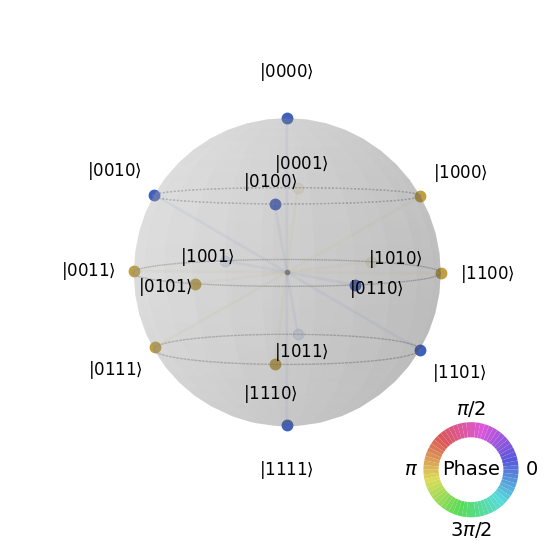

(None, None)

In [ ]:
entrelazamiento(4)

### Medida

![medida](medida.png)
En computación cuántica, la "medida" se refiere a un proceso fundamental en el cual se obtiene información sobre el estado cuántico de un qubit o un conjunto de qubits. La medida es una operación esencial porque es la forma en que obtenemos resultados de un cálculo cuántico y extraemos información útil de un sistema cuántico.

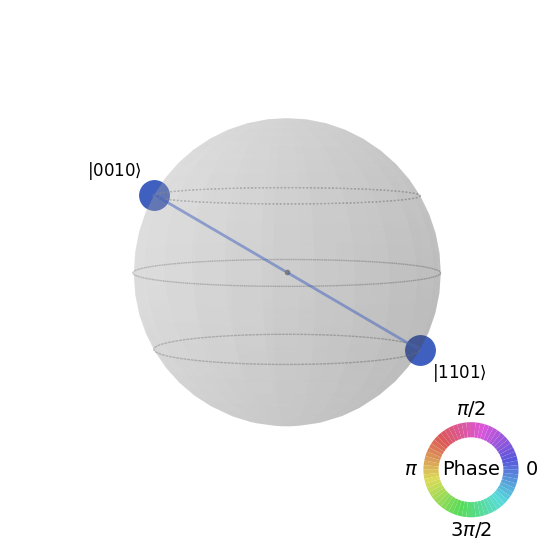

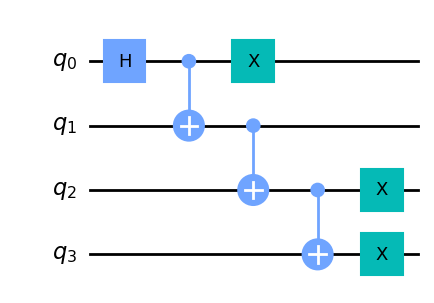

In [ ]:
# Import the needed libraries
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere

# Create the circuit
circuit = QuantumCircuit(4)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.cx(2,3)
circuit.x(0)
circuit.x(2)
circuit.x(3)
 # Graph the circuit and Bloch Sphere
display(plot_state_qsphere(circuit))
display(circuit.draw('mpl'))

In [ ]:
# Get statevector from circuit
from qiskit.quantum_info import Statevector

statevector = Statevector.from_instruction(circuit)

Simulator Probability Distribution: {'1101': 0.4794921875, '0010': 0.5205078125}


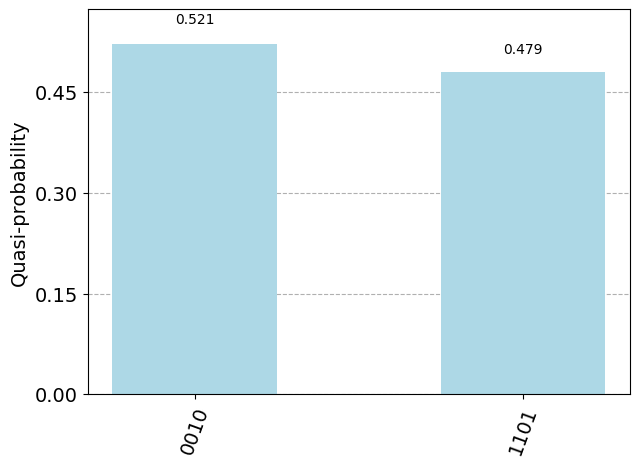

In [ ]:
# Run this cell to view the output of your quantum circuit as a histogram
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.tools.visualization import plot_distribution

# Run the circuit on the simulator and get probability distribution
sampler = AerSampler()
circuit.measure_all() # measure all qubits
job = sampler.run(circuit)
prob_distribution = job.result().quasi_dists[0].binary_probabilities()

# Print and plot results
#rint(statevector)
print("Simulator Probability Distribution:", prob_distribution)
plot_distribution(prob_distribution, color=['lightblue'])

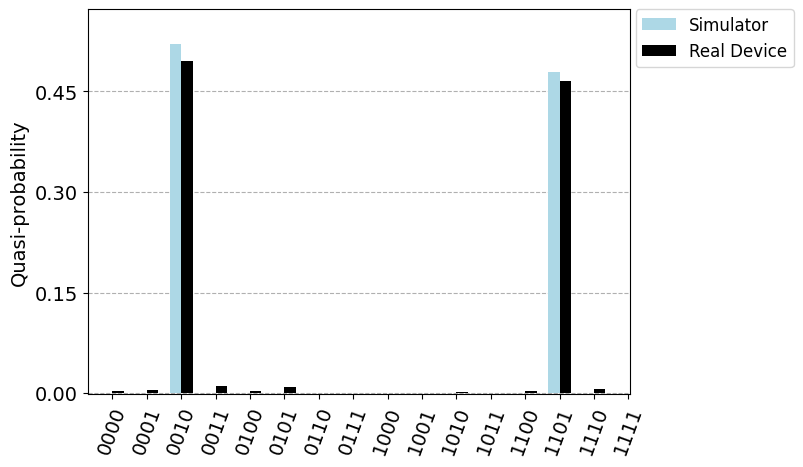

In [ ]:
# Import the libraries we need
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

service = QiskitRuntimeService(channel="ibm_quantum")

# Get the least busy backend, this step may take a while
real_backend = service.least_busy(min_num_qubits=4, simulator=False)

with Session(service, backend=real_backend) as session:
    sampler = Sampler(session=session)
    job_real = sampler.run(circuit)
# Get the dictionary of probability distributions
prob_distribution_real = job_real.result().quasi_dists[0].binary_probabilities()

# Plot the result
plot_distribution(
    data=[prob_distribution, prob_distribution_real],
    legend=['Simulator', 'Real Device'],
    color=['lightblue', 'black'],
    bar_labels = False
)

## Computador Cuantico

Varias empresas estan construyendo servidores cuenticos: Google, Microsoft, Windows, Amazon.

![ibm_processor.png](ibm_processor.png)
![processor.jpg](processor.jpg)
![computer.jpg](computer.jpg)


## Aplicaciones


- **[Criptografia]**

La computación cuántica podría romper algoritmos de criptografía actualmente seguros, como el RSA y el ECC, lo que plantea la necesidad de desarrollar técnicas de criptografía cuántica para garantizar la seguridad de las comunicaciones.
![cripto](cripto.png)
- **[Optimización]**

La computación cuántica puede resolver problemas de optimización, como la programación lineal o la asignación de recursos, de manera más eficiente. Esto podría aplicarse en logística, diseño de rutas, planificación de producción y más.

![optimizacion](optimizacion.jpg)

- **[Simulación cuántica]**

Las computadoras cuánticas son ideales para simular sistemas cuánticos complejos, lo que es esencial en la investigación de materiales, desarrollo de fármacos y comprensión de reacciones químicas a nivel molecular.

![quantum_simulation](quantum_simul.jpeg)

- **[Machine Learning cuántico]**

La computación cuántica podría mejorar los algoritmos de aprendizaje automático, lo que podría tener aplicaciones en reconocimiento de patrones, análisis de datos y optimización de algoritmos de inteligencia artificial.

![qml](qml.jpeg)

- **[Finanzas]**

La optimización de carteras, el modelado de riesgos y la valoración de derivados financieros son ejemplos de aplicaciones financieras donde la computación cuántica podría ser beneficiosa.

![finanzas](finanzas.jpeg)

- **[Investigación científica]**

La computación cuántica podría acelerar la resolución de problemas científicos complejos, como la simulación de sistemas climáticos, la predicción de terremotos o la investigación en física de partículas.

![science](science.jpg)
- **[Seguridad y detección de fraudes]**

La computación cuántica podría mejorar los sistemas de seguridad y la detección de fraudes al procesar grandes cantidades de datos de manera más eficiente.


-**[Inteligencia artificial]**

Los algoritmos cuánticos podrían utilizarse para mejorar la eficiencia de la optimización en problemas de IA, como la búsqueda de soluciones óptimas en espacios de búsqueda vastos.

![inteligencia](artificial_intelligence.jpeg)

Es importante destacar que la computación cuántica todavía está en desarrollo y enfrenta desafíos técnicos significativos, como la corrección de errores cuánticos y la estabilidad de los qubits. Sin embargo, a medida que esta tecnología evolucione, es probable que veamos un aumento en sus aplicaciones prácticas en una variedad de campos.

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

Este material ha sido elaborado por Hernan Dario Vaquilema G. 2023